In [2]:
getwd()
library("data.table")
library("stm")
yle <- fread("/work/cloud-user/russia_finland/finland_russia/data/processed/yle_fi_merged.csv")



[1] "/work/cloud-user/russia_finland/finland_russia"

In [4]:
str(yle)

Classes ‘data.table’ and 'data.frame':	68478 obs. of  5 variables:
 $ Kaukasian konflikti: Aseissa Georgia ja Venäjän tukemat Etelä-Ossetia ja Abhasia                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

ERROR: Error in head(integrumreg): object 'integrumreg' not found


In [5]:
##remove columns to make the file thinner
integrumreg_id_year_lemma <- integrumreg[,c("id", "year", "lemmas_content")]

In [6]:
articlesintegrumreg <- as.data.frame(integrumreg_id_year_lemma)


In [15]:
head(articlesintegrumreg)

id,year,lemmas_content


In [10]:
library("tm")
darianstopwords <- c(stopwords("russian"), "/n", "quot","nbsp","/n")

Loading required package: NLP


In [ ]:
regional_processed <- textProcessor(
  articlesintegrumreg$lemmas_content, 
  metadata = articlesintegrumreg,
  stem=FALSE,
  customstopwords = darianstopwords)

saveRDS(regional_processed, "processed_integrum_regional.rds")

##
regional_out <- prepDocuments(
  regional_processed$documents, 
  regional_processed$vocab,
  regional_processed$meta,
  lower.thresh = 15)

saveRDS(regional_out, "out_integrum_regional.rds")

##
regional_model_fit <- stm(
  regional_out$documents, 
  regional_out$vocab, 
  K = 30,
  prevalence =~ year, 
  max.em.its = 100,
  data = energy_out$meta, 
  init.type = "Spectral")

saveRDS(regional_model_fit, "STMreg30.rds")

##
regional_prep <- estimateEffect(1:30 ~ year, regional_model_fit,meta = out$meta, uncertainty = "Global")
saveRDS(regional_model_fit, "STMreg30.rds")

##
labelTopics(regional_model.fit, topics = NULL, n = 10, frexweight = 0.8)
plot(regional_model_fit, "summary")
plot(regional_model_fit)
plot(regional_model_fit,type="hist")

## table with topic-to-documnt
reg30dt <- make.dt(regional_model.fit, meta = NULL)
saveRDS <- (reg30dt, "document_topic_reg.rds")

##
plot(
  regional_prep, "year", 
  method = "continuous", 
  topics = 3, 
  printlegend = FALSE,
  xaxt = "n",
  xlab = "Years",
  main = "Topic 3")
axis(1,at=seq(from=2000, to=2017,by=1))

[1] "и"      "в"      "во"     "не"     "что"    "он"     "на"     "я"     
 [9] "с"      "со"     "как"    "а"      "то"     "все"    "она"    "так"   
[17] "его"    "но"     "да"     "ты"     "к"      "у"      "же"     "вы"    
[25] "за"     "бы"     "по"     "только" "ее"     "мне"    "было"   "вот"   
[33] "от"     "меня"   "еще"    "нет"    "о"      "из"     "ему"    "теперь"
[41] "когда"  "даже"   "ну"     "вдруг"  "ли"     "если"   "уже"    "или"   
[49] "ни"     "быть"

ERROR: Error in textProcessor(articlesintegrumfed$lemmas_content, metadata = articlesintegrumfed, : object 'articlesintegrumfed' not found


Removing 150096 of 179505 terms (421351 of 6817891 tokens) due to frequency 
Removing 2 Documents with No Words 
Your corpus now has 25372 documents, 29409 terms and 6396540 tokens.

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 	..............................
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
....................................................................................................
Completed E-Step (147 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -8.590) 
....................................................................................................
Completed E-Step (78 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -7.853, relative change = 8.585e-02) 
....................................................................................................
Completed E-Step (64 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound =

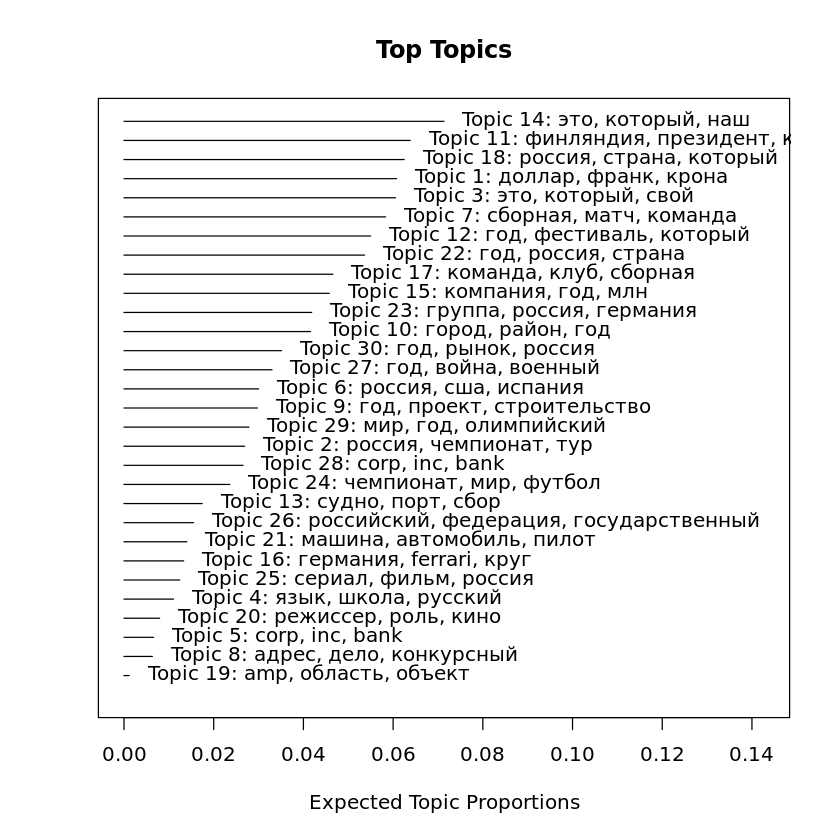

In [73]:
library("wordcloud")
cloud(model.fit, topic=4)

ERROR: Error in library("wordcloud"): there is no package called ‘wordcloud’


docnum,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,⋯,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27,Topic28,Topic29,Topic30
1,0.0006901195,2.438267e-05,2.439581e-01,2.259384e-03,1.040922e-06,7.310084e-06,8.872726e-02,1.442633e-04,2.266917e-04,⋯,4.893884e-04,2.126465e-03,0.0004792781,4.505738e-04,6.747615e-05,0.0001749411,0.001092395,1.447060e-06,0.0058155936,0.0008687164
2,0.0001299479,3.074808e-06,8.341976e-01,5.891056e-03,4.608971e-07,2.462573e-05,1.325620e-04,9.360979e-05,7.428406e-06,⋯,6.096914e-05,9.176003e-05,0.0001164021,3.081403e-05,4.727634e-04,0.0001005632,0.098393130,4.365512e-07,0.0004885154,0.0001597694
3,0.0229743793,2.434512e-05,9.978114e-02,3.225740e-02,3.993688e-05,1.158428e-04,2.152430e-04,8.318225e-04,1.319245e-03,⋯,6.147628e-04,2.027825e-01,0.0084669226,3.095218e-04,6.671543e-04,0.0021002224,0.024463287,7.337534e-05,0.0016966049,0.0978729255
4,0.0002358590,2.034140e-06,2.612714e-02,1.063854e-03,9.683334e-07,1.150532e-05,6.717114e-05,6.131492e-04,1.356235e-04,⋯,1.723983e-04,8.295008e-04,0.0002101939,1.546969e-05,1.014625e-04,0.0068131534,0.334658027,6.117209e-07,0.0002573895,0.0005930705
5,0.0028760743,5.515281e-05,6.015918e-05,4.749332e-05,1.832929e-03,6.899709e-05,6.253077e-05,1.111097e-03,5.011018e-01,⋯,3.501916e-02,7.600209e-02,0.0013788008,5.184128e-05,6.093634e-05,0.0009851557,0.000205302,4.951006e-02,0.0001445193,0.0200723060
6,0.0008610340,3.524449e-05,1.062995e-01,1.391027e-03,3.111428e-06,6.671804e-06,1.815032e-01,3.550639e-04,3.331124e-04,⋯,9.683725e-04,3.954080e-03,0.0008124577,5.788739e-04,7.088138e-05,0.0005914714,0.001328564,5.379103e-06,0.0083052383,0.0057890101


id,Topic4
1,2.259384e-03
2,5.891056e-03
3,3.225740e-02
4,1.063854e-03
5,4.749332e-05
6,1.391027e-03


id,Topic4,year,lemmas_content


id,Topic4
23774,0.9996679
23488,0.9994274
23560,0.6730085
2091,0.5538542
15518,0.5437729
14627,0.5280459


          id       Topic4 year
    1: 23774 9.996679e-01 2013
    2: 23488 9.994274e-01 2012
    3: 23560 6.730085e-01 2012
    4:  2091 5.538542e-01 2014
    5: 15518 5.437729e-01 2007
    6: 14627 5.280459e-01 2001
    7: 23887 5.172843e-01 2013
    8: 10365 5.067801e-01 2007
    9: 23105 4.937480e-01 2010
   10: 15988 4.834512e-01 2009
   11: 15397 4.827843e-01 2007
   12:   311 4.808139e-01 2004
   13: 15584 4.696633e-01 2007
   14: 15514 4.653518e-01 2007
   15: 18990 4.628821e-01 2012
   16: 23678 4.590981e-01 2012
   17: 23124 4.574141e-01 2011
   18: 15309 4.548548e-01 2006
   19: 23169 4.540781e-01 2011
   20: 15031 4.467528e-01 2004
   ---                        
25348:  2809 1.727959e-06 2000
25349: 23917 1.725265e-06 2013
25350:  9755 1.718934e-06 2007
25351:  7153 1.623713e-06 2004
25352:  8646 1.502024e-06 2005
25353: 23566 1.470241e-06 2012
25354: 21547 1.453545e-06 2007
25355:  5322 1.437476e-06 2002
25356:  6033 1.416804e-06 2003
25357: 21446 1.326975e-06 2007
25358:  

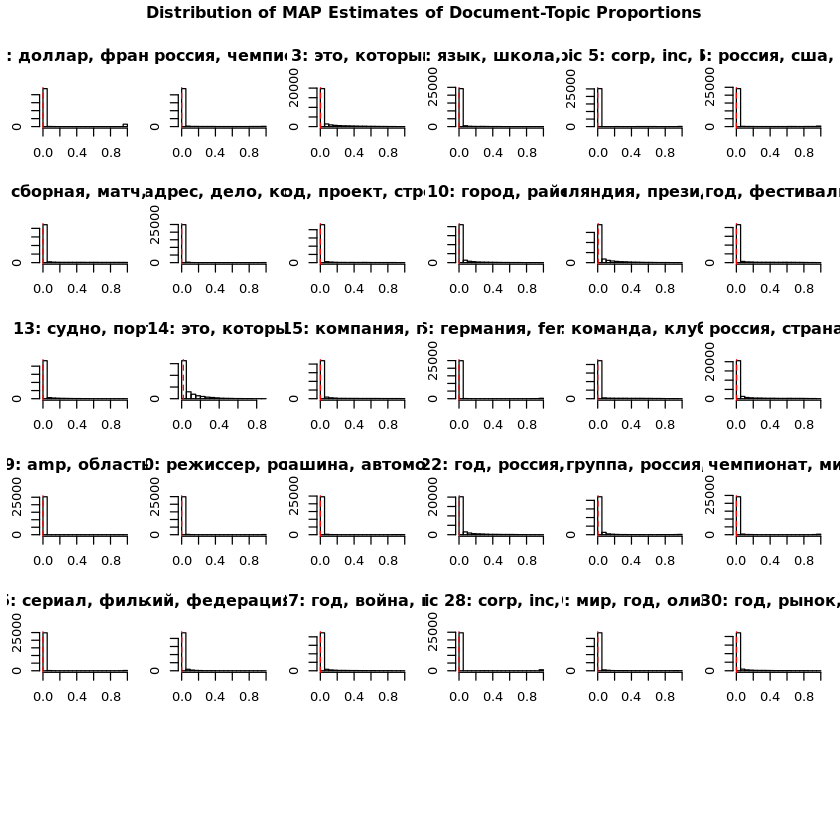

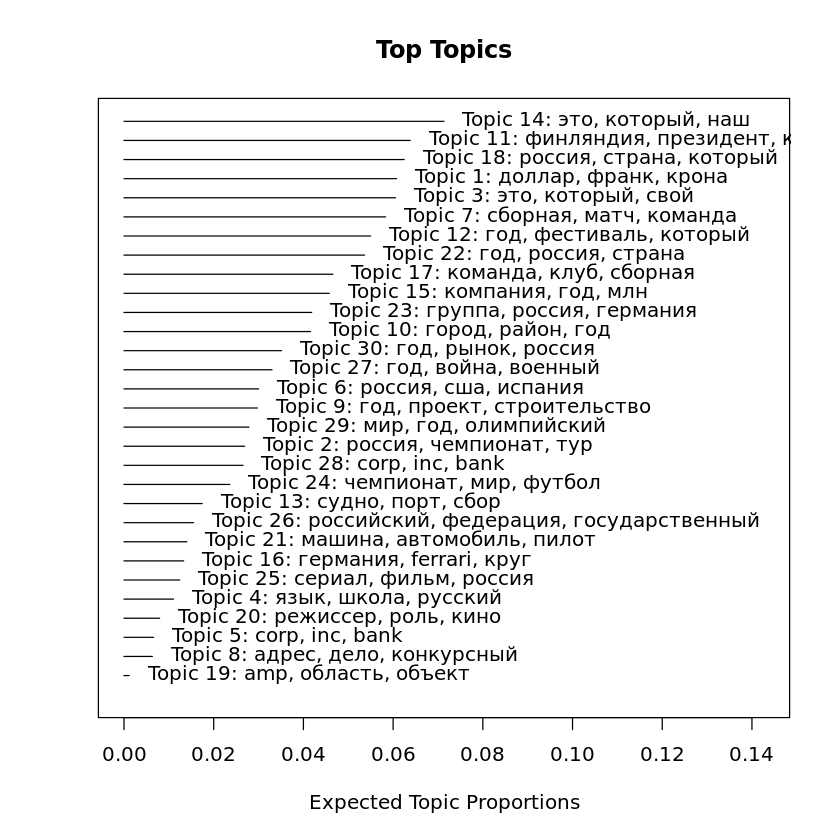

ERROR: Error in findThoughts(model.fit, texts = integrumfed$lemmas_content, topics = 1, : Number of provided texts and number of documents modeled do not match


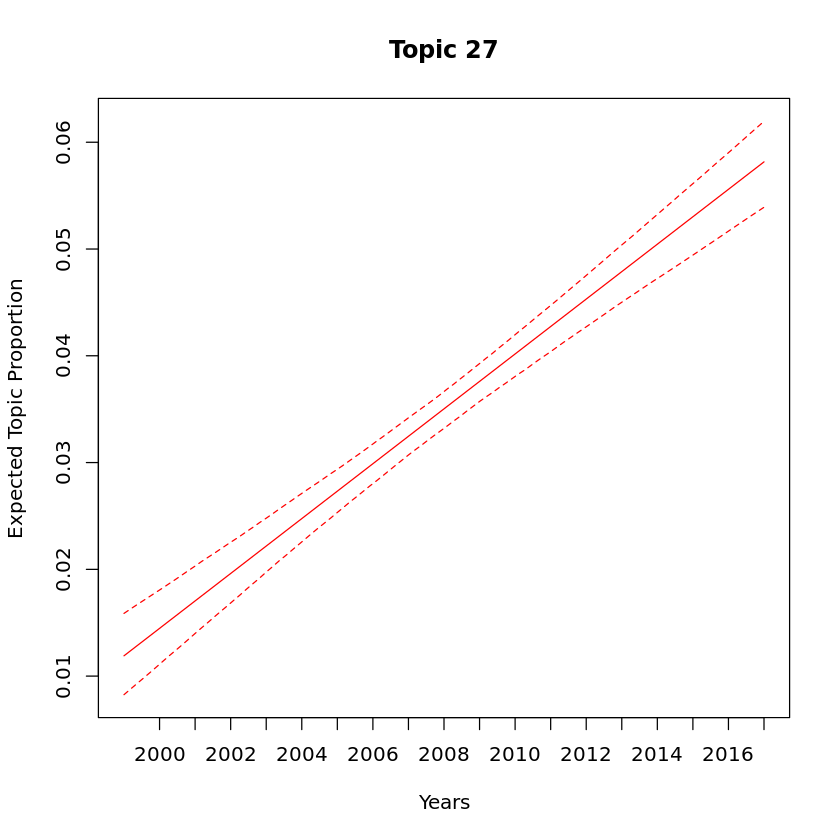

[1] "articlesintegrumfed" "corp"                "corp1"              
 [4] "corp2"               "corp3"               "corp4"              
 [7] "corp5"               "corp6"               "corpdtm"            
[10] "corpLDA10"           "corpLDA30"           "corpvalmis"         
[13] "darianstopwords"     "integrumfed"         "integrumfed_id"     
[16] "integrumreg"         "LDA10terms"          "LDA30terms"         
[19] "model.fit"           "mod.out.corr"        "out"                
[22] "prep"                "processed"           "toSpace"

[1] "articlesintegrumfed" "corp"                "corp1"              
 [4] "corp2"               "corp3"               "corp4"              
 [7] "corp5"               "corp6"               "corpdtm"            
[10] "corpLDA10"           "corpLDA30"           "corpvalmis"         
[13] "darianstopwords"     "integrumfed"         "integrumfed_id"     
[16] "integrumreg"         "LDA10terms"          "LDA30terms"         
[19] "model.fit"           "mod.out.corr"        "out"                
[22] "prep"                "processed"           "toSpace"

Topic 1 Top Words:
 	 Highest Prob: доллар, франк, крона, марка, евро, сша, фунт, английский, шведский, французский 
 	 FREX: крона, франк, доллар, фунт, марка, евро, лира, шведский, английский, итальянский 
 	 Lift: португальск, эскудо, reuter, иена, голландск, драхма, ирландски, лотовой, португаль, тенге 
 	 Score: крона, песета, франк, гульден, эскудо, фунт, иена, лира, доллар, марка 
Topic 2 Top Words:
 	 Highest Prob: россия, чемпионат, тур, очки, германия, норвегия, оба, динамо, положение, кубок 
 	 FREX: финикс, миннесота, филадельфия, даллас, чикаго, ньюджерси, atlanta, бостон, овертайм, детройт 
 	 Lift: athletic, bastia, bologna, brescia, chievo, cibona, clippers, cologne, espanyol, fiorentina 
 	 Score: чемпионат, овертайм, динамо, кубок, матч, очки, буллит, финикс, очко, бросок 
Topic 3 Top Words:
 	 Highest Prob: это, который, свой, год, говорить, наш, становиться, знать, время, жить 
 	 FREX: мама, сидеть, муж, отец, бабушка, ndash, спрашивать, любить, папа, laquo 
 	 Lif

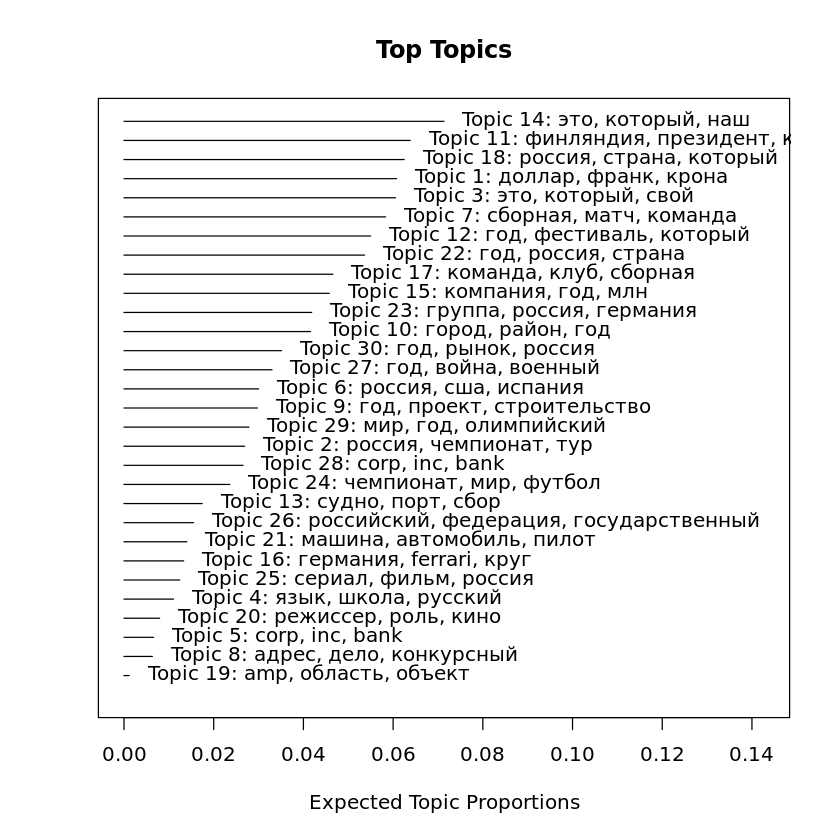

ERROR: Error in library("igraph"): there is no package called ‘igraph’


ERROR: Error in plot.topicCorr(mod.out.corr): Install the igraph package to use this function.
